In [51]:
import pandas as pd

In [52]:
df=pd.read_csv("C:/Users/swastik dasgupta/Desktop/sentiment_analysis_project/data/Reviews.csv")

In [53]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [55]:
df = df.drop(['Id', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 
              'HelpfulnessDenominator', 'Time'], axis=1)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  568454 non-null  object
 1   Score      568454 non-null  int64 
 2   Summary    568427 non-null  object
 3   Text       568454 non-null  object
dtypes: int64(1), object(3)
memory usage: 17.3+ MB


In [57]:
df.head()

,ProductId,Score,Summary,Text
0,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...


In [58]:
def label_summary(score):
    if score<2:
        return "Negative"
    elif score==3:
        return "Neutral"
    else:
        return "Positive"
df["Sentiment"]=df["Score"].apply(label_summary)

In [59]:
df.head()

,ProductId,Score,Summary,Text,Sentiment
0,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...,Positive
4,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...,Positive


In [60]:
df["Review"]=df["Summary"]+' '+df["Text"]

In [61]:
df.head()

,ProductId,Score,Summary,Text,Sentiment,Review
0,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,Good Quality Dog Food I have bought several of...
1,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,Not as Advertised Product arrived labeled as J...
2,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,"""Delight"" says it all This is a confection tha..."
3,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient i...,Positive,Cough Medicine If you are looking for the secr...
4,B006K2ZZ7K,5,Great taffy,Great taffy at a great price. There was a wid...,Positive,Great taffy Great taffy at a great price. The...


In [62]:
df=df.drop(["Score","Summary","Text"],axis=1)

In [63]:
df.head()

,ProductId,Sentiment,Review
0,B001E4KFG0,Positive,Good Quality Dog Food I have bought several of...
1,B00813GRG4,Negative,Not as Advertised Product arrived labeled as J...
2,B000LQOCH0,Positive,"""Delight"" says it all This is a confection tha..."
3,B000UA0QIQ,Positive,Cough Medicine If you are looking for the secr...
4,B006K2ZZ7K,Positive,Great taffy Great taffy at a great price. The...


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  568454 non-null  object
 1   Sentiment  568454 non-null  object
 2   Review     568427 non-null  object
dtypes: object(3)
memory usage: 13.0+ MB


In [65]:
import re
import string
def clean_text(text):
    if not isinstance(text, str):  # skip NaN or non-string entries
        return ""
    text=text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"[^a-z\s]", "", text) # keep only letters
    text = re.sub(r"\s+", " ", text)     # remove extra spaces
    return text.strip()
df["Cleaned_Review"] = df["Review"].apply(clean_text)

In [66]:
df.head()

,ProductId,Sentiment,Review,Cleaned_Review
0,B001E4KFG0,Positive,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...
1,B00813GRG4,Negative,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...
2,B000LQOCH0,Positive,"""Delight"" says it all This is a confection tha...",delight says it all this is a confection that ...
3,B000UA0QIQ,Positive,Cough Medicine If you are looking for the secr...,cough medicine if you are looking for the secr...
4,B006K2ZZ7K,Positive,Great taffy Great taffy at a great price. The...,great taffy great taffy at a great price there...


In [67]:
df=df.drop("Review",axis=1)

In [80]:
df.head()

,ProductId,Sentiment,Cleaned_Review,label
0,B001E4KFG0,Positive,good quality dog food i have bought several of...,2
1,B00813GRG4,Negative,not as advertised product arrived labeled as j...,0
2,B000LQOCH0,Positive,delight says it all this is a confection that ...,2
3,B000UA0QIQ,Positive,cough medicine if you are looking for the secr...,2
4,B006K2ZZ7K,Positive,great taffy great taffy at a great price there...,2


In [82]:
df=df.drop(["Sentiment"],axis=1)
df.head()


,ProductId,Cleaned_Review,label
0,B001E4KFG0,good quality dog food i have bought several of...,2
1,B00813GRG4,not as advertised product arrived labeled as j...,0
2,B000LQOCH0,delight says it all this is a confection that ...,2
3,B000UA0QIQ,cough medicine if you are looking for the secr...,2
4,B006K2ZZ7K,great taffy great taffy at a great price there...,2


In [83]:
# ============================================================
# 💾 Save Cleaned + Mapped Dataset
# ============================================================
import os
import pandas as pd

# Ensure 'data' folder exists in your project
os.makedirs("data", exist_ok=True)

# Path to save the processed dataset
save_path = os.path.join("data", "cleaned_reviews.csv")

# Save DataFrame (no index)
df.to_csv(save_path, index=False, encoding='utf-8')

print(f"\n✅ Cleaned and labeled dataset saved successfully at: {save_path}")
print(f"📊 Total samples: {len(df)}")
print("Columns:", list(df.columns))



✅ Cleaned and labeled dataset saved successfully at: data\cleaned_reviews.csv
📊 Total samples: 568426
Columns: ['ProductId', 'Cleaned_Review', 'label']


✅ Loading pre-cleaned dataset: data/cleaned_reviews.csv
Columns: ['ProductId', 'Cleaned_Review', 'label']
    ProductId                                     Cleaned_Review  label
0  B001E4KFG0  good quality dog food i have bought several of...      2
1  B00813GRG4  not as advertised product arrived labeled as j...      0
2  B000LQOCH0  delight says it all this is a confection that ...      2

Train size: 454740, Test size: 113686


Map:   0%|          | 0/454740 [00:00<?, ? examples/s]

Map:   0%|          | 0/113686 [00:00<?, ? examples/s]


Inspection before torch conversion:
Train columns: ['label', 'input_ids', 'attention_mask']
Unique labels: [0, 1, 2]
Label counts: Counter({2: 378815, 0: 41814, 1: 34111})

💻 Using device: cuda

✅ Using pre-mapped numeric labels from cleaned_reviews.csv
   label
0      2
1      0
2      2
3      2
4      2


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



⚡ Using small subset for faster preview.


c:\Users\swastik dasgupta\anaconda3\envs\torch_gpu\lib\site-packages\transformers\training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
c:\Users\swastik dasgupta\anaconda3\envs\torch_gpu\lib\site-packages\accelerate\accelerator.py:479: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


  0%|          | 0/626 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.4102252423763275, 'eval_accuracy': 0.853, 'eval_f1': 0.8110797510907661, 'eval_runtime': 3.6018, 'eval_samples_per_second': 277.636, 'eval_steps_per_second': 17.491, 'epoch': 1.0}
{'loss': 0.3714, 'grad_norm': 2.0307295322418213, 'learning_rate': 4.089456869009585e-06, 'epoch': 1.6}


  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.32518908381462097, 'eval_accuracy': 0.866, 'eval_f1': 0.8574720178927028, 'eval_runtime': 3.6043, 'eval_samples_per_second': 277.446, 'eval_steps_per_second': 17.479, 'epoch': 2.0}
{'train_runtime': 140.5009, 'train_samples_per_second': 71.174, 'train_steps_per_second': 4.455, 'train_loss': 0.35068229212166785, 'epoch': 2.0}


  0%|          | 0/63 [00:00<?, ?it/s]


Evaluation Results: {'eval_loss': 0.32518908381462097, 'eval_accuracy': 0.866, 'eval_f1': 0.8574720178927028, 'eval_runtime': 3.6297, 'eval_samples_per_second': 275.508, 'eval_steps_per_second': 17.357, 'epoch': 2.0}


  0%|          | 0/63 [00:00<?, ?it/s]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.72      0.74       105
     Neutral       0.46      0.31      0.37        90
    Positive       0.91      0.95      0.93       805

    accuracy                           0.87      1000
   macro avg       0.71      0.66      0.68      1000
weighted avg       0.85      0.87      0.86      1000



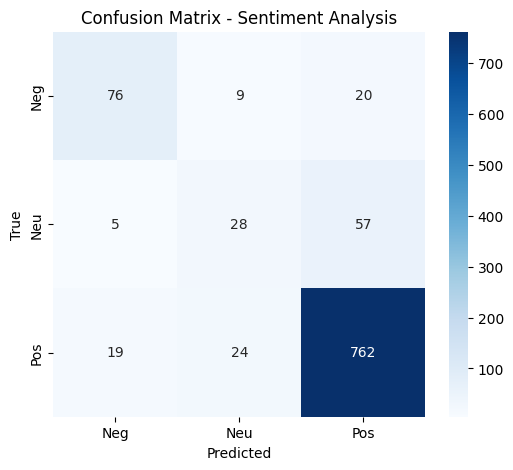


✅ Model and tokenizer saved successfully!

Sample Predictions:
This product is absolutely fantastic, I love it! → {'label': 'Positive', 'score': 0.9911386370658875}
Not worth the price. Completely disappointed. → {'label': 'Positive', 'score': 0.4251119792461395}
It’s okay, does the job but nothing special. → {'label': 'Positive', 'score': 0.7779628038406372}


In [1]:
# ============================================================
# 🧩 UNIVERSAL SAFE NUMPY PATCH — FIXES subok / copy=False / kwargs ERRORS
# ============================================================
import builtins
import numpy as np

_old_array = np.array  # keep original safe reference

def safe_array(obj, *args, **kwargs):
    # Filter out unsupported or problematic keyword args
    valid_keys = ["dtype", "order", "like", "copy"]
    safe_kwargs = {k: v for k, v in kwargs.items() if k in valid_keys}

    try:
        return _old_array(obj, *args, **safe_kwargs)
    except Exception:
        # Retry with a safe copy if needed
        safe_kwargs["copy"] = True
        return _old_array(obj, *args, **safe_kwargs)

np.array = safe_array


# ============================================================
# 1️⃣ SIMPLE IMPORTS
# ============================================================
import os
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    pipeline
)
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pyarrow as pa

# ============================================================
# 2️⃣ LOAD PRE-CLEANED DATA OR CREATE IT
# ============================================================
data_path = "data/cleaned_reviews.csv"

if os.path.exists(data_path):
    print(f"✅ Loading pre-cleaned dataset: {data_path}")
    df = pd.read_csv(data_path)
else:
    print("❌ cleaned_reviews.csv not found. Please clean and save it first.")
    raise FileNotFoundError

print("Columns:", df.columns.tolist())
print(df.head(3))

# ============================================================
# 3️⃣ Split Train / Test
# ============================================================
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)
print(f"\nTrain size: {len(train_df)}, Test size: {len(test_df)}")

# ============================================================
# 4️⃣ Convert to Hugging Face Datasets
# ============================================================
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

# ============================================================
# 5️⃣ Tokenization
# ============================================================
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_fn(batch):
    return tokenizer(
        batch["Cleaned_Review"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

train_ds = train_ds.map(tokenize_fn, batched=True)
test_ds = test_ds.map(tokenize_fn, batched=True)

# Remove unnecessary columns
for col in ["ProductId", "Cleaned_Review", "__index_level_0__"]:
    if col in train_ds.column_names:
        train_ds = train_ds.remove_columns(col)
    if col in test_ds.column_names:
        test_ds = test_ds.remove_columns(col)

# ============================================================
# 6️⃣ Verify Labels (Arrow-safe)
# ============================================================
arrow_column = train_ds.data.column("label")
labels_np = arrow_column.to_numpy(zero_copy_only=False)
print("\nInspection before torch conversion:")
print("Train columns:", train_ds.column_names)
print("Unique labels:", sorted(set(labels_np.tolist())))
print("Label counts:", Counter(labels_np.tolist()))

train_ds.set_format("torch")
test_ds.set_format("torch")

# ============================================================
# 7️⃣ Device Setup
# ============================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"\n💻 Using device: {device}")


# ============================================================
# 8️⃣ Model Setup (No Remapping — Uses Existing Numeric Labels)
# ============================================================
# These mappings are only for model metadata, not remapping
label2id = { "Negative": 0, "Neutral": 1, "Positive": 2 }
id2label = { v: k for k, v in label2id.items() }

print("\n✅ Using pre-mapped numeric labels from cleaned_reviews.csv")
print(df[['label']].head())

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
).to(device)


# ============================================================
# 9️⃣ Metrics
# ============================================================
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}

# ============================================================
# 🔟 Training Configuration
# ============================================================
use_small_subset = True  # set False for full training

if use_small_subset:
    print("\n⚡ Using small subset for faster preview.")
    train_ds = train_ds.shuffle(seed=42).select(range(5000))
    test_ds = test_ds.shuffle(seed=42).select(range(1000))

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16 if device == "cuda" else 8,
    per_device_eval_batch_size=16 if device == "cuda" else 8,
    num_train_epochs=2 if use_small_subset else 4,
    weight_decay=0.01,
    logging_dir="./logs",
    fp16=True if device == "cuda" else False,
    load_best_model_at_end=True,
)

# ============================================================
# 11️⃣ Trainer
# ============================================================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)

# ============================================================
# 12️⃣ Train & Evaluate
# ============================================================
trainer.train()
results = trainer.evaluate()
print("\nEvaluation Results:", results)

# ============================================================
# 13️⃣ Classification Report & Confusion Matrix
# ============================================================
preds_output = trainer.predict(test_ds)
preds = np.argmax(preds_output.predictions, axis=1)
labels = preds_output.label_ids

print("\nClassification Report:\n", classification_report(
    labels, preds, target_names=["Negative", "Neutral", "Positive"]
))

cm = confusion_matrix(labels, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Sentiment Analysis")
plt.show()

# ============================================================
# 14️⃣ Save Model & Tokenizer
# ============================================================
os.makedirs("model", exist_ok=True)
model.save_pretrained("model/sentiment_bert")
tokenizer.save_pretrained("model/sentiment_bert")
print("\n✅ Model and tokenizer saved successfully!")

# ============================================================
# 15️⃣ Quick Demo on New Samples
# ============================================================
sentiment_analyzer = pipeline(
    "text-classification",
    model="model/sentiment_bert",
    tokenizer="model/sentiment_bert",
    device=0 if device == "cuda" else -1
)

samples = [
    "This product is absolutely fantastic, I love it!",
    "Not worth the price. Completely disappointed.",
    "It’s okay, does the job but nothing special."
]

print("\nSample Predictions:")
for s in samples:
    print(f"{s} → {sentiment_analyzer(s)[0]}")


In [2]:
from transformers import pipeline

# Load your fine-tuned model & tokenizer
sentiment_analyzer = pipeline(
    "text-classification",
    model="model/sentiment_bert",
    tokenizer="model/sentiment_bert",
    device=0 if torch.cuda.is_available() else -1
)

# Test samples (feel free to expand this)
samples = [
    "Absolutely love this! Works perfectly and looks great.",
    "Terrible experience, it broke in two days.",
    "It’s okay, nothing special but not bad either.",
    "Delivery was late, but the product quality is fine.",
    "Fantastic build quality. Exceeded my expectations.",
    "Not worth the price. Really disappointed.",
    "Average performance. Gets the job done.",
    "I hate the taste, will not buy again.",
    "Very happy with the purchase!",
    "It’s usable but could be better."
]

print("\n🧪 Model Testing on Sample Reviews:\n")
for s in samples:
    result = sentiment_analyzer(s)[0]
    print(f"{s}\n→ Predicted: {result['label']} (score={result['score']:.3f})\n")



🧪 Model Testing on Sample Reviews:

Absolutely love this! Works perfectly and looks great.
→ Predicted: Positive (score=0.991)

Terrible experience, it broke in two days.
→ Predicted: Negative (score=0.683)

It’s okay, nothing special but not bad either.
→ Predicted: Positive (score=0.533)

Delivery was late, but the product quality is fine.
→ Predicted: Positive (score=0.707)

Fantastic build quality. Exceeded my expectations.
→ Predicted: Positive (score=0.977)

Not worth the price. Really disappointed.
→ Predicted: Positive (score=0.465)

Average performance. Gets the job done.
→ Predicted: Positive (score=0.836)

I hate the taste, will not buy again.
→ Predicted: Negative (score=0.617)

Very happy with the purchase!
→ Predicted: Positive (score=0.987)

It’s usable but could be better.
→ Predicted: Positive (score=0.602)



In [3]:
import pandas as pd
p=pd.read_csv("data/cleaned_reviews.csv")
p["label"].value_counts()

label
2    473520
0     52268
1     42638
Name: count, dtype: int64

In [1]:
# ============================================================
# 🧩 NUMPY PATCH (fix NumPy 2.0 incompatibility)
# ============================================================
import numpy as np
_old_array = np.array

def safe_array(obj, *args, **kwargs):
    safe_kwargs = {k: v for k, v in kwargs.items() if k in ["dtype", "order", "like", "copy"]}
    try:
        return _old_array(obj, *args, **safe_kwargs)
    except Exception:
        safe_kwargs["copy"] = True
        return _old_array(obj, *args, **safe_kwargs)

np.array = safe_array


# ============================================================
# 1️⃣ Imports
# ============================================================
import os
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
import torch
from torch.nn import CrossEntropyLoss


# ============================================================
# 2️⃣ Load Dataset
# ============================================================
data_path = "data/cleaned_reviews.csv"
df = pd.read_csv(data_path)
print(f"✅ Loaded dataset with {len(df)} samples")

# Train/test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])
print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")


# ============================================================
# 3️⃣ Tokenizer and Device Setup
# ============================================================
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"💻 Using device: {device}")


# ============================================================
# 4️⃣ Class Weights for Imbalance
# ============================================================
classes = np.unique(train_df["label"])
weights = compute_class_weight(class_weight="balanced", classes=classes, y=train_df["label"])
weights = torch.tensor(weights, dtype=torch.float).to(device)
print("Class Weights:", weights)


# ============================================================
# 5️⃣ Define Helper Functions
# ============================================================
def tokenize_fn(batch):
    return tokenizer(
        batch["Cleaned_Review"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    acc = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average="weighted")
    return {"accuracy": acc, "f1": f1}


# ============================================================
# 6️⃣ Custom Trainer with Weighted Loss
# ============================================================
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits.view(-1, model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss


# ============================================================
# 7️⃣ Batch Training Setup
# ============================================================
BATCH_SIZE = 50000  # how many samples to train at once
EPOCHS_PER_BATCH = 1
total_batches = len(train_df) // BATCH_SIZE + 1
print(f"\n🔄 Training in {total_batches} batches of {BATCH_SIZE} samples each\n")

# Load model once at start
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
).to(device)


# ============================================================
# 8️⃣ Incremental Training Loop
# ============================================================
for i in range(total_batches):
    print(f"\n🧩 Training Batch {i+1}/{total_batches}...")

    # Select subset
    start = i * BATCH_SIZE
    end = min((i + 1) * BATCH_SIZE, len(train_df))
    batch_df = train_df.iloc[start:end]

    # Convert to dataset
    batch_ds = Dataset.from_pandas(batch_df).map(tokenize_fn, batched=True)
    for col in ["ProductId", "Cleaned_Review", "__index_level_0__"]:
        if col in batch_ds.column_names:
            batch_ds = batch_ds.remove_columns(col)
    batch_ds.set_format("torch")

    # Training args
    training_args = TrainingArguments(
        output_dir=f"./results_batch_{i+1}",
        num_train_epochs=EPOCHS_PER_BATCH,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        learning_rate=2e-5,
        weight_decay=0.01,
        evaluation_strategy="no",
        save_strategy="no",
        logging_dir=f"./logs_batch_{i+1}",
        fp16=True if device == "cuda" else False
    )

    # Trainer
    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=batch_ds,
        compute_metrics=compute_metrics
    )

    # Train this batch
    trainer.train()

    # Save model checkpoint
    checkpoint_dir = f"model/checkpoint_batch_{i+1}"
    os.makedirs(checkpoint_dir, exist_ok=True)
    model.save_pretrained(checkpoint_dir)
    tokenizer.save_pretrained(checkpoint_dir)
    print(f"✅ Saved checkpoint: {checkpoint_dir}")

    # Free up memory before next batch
    del batch_ds
    torch.cuda.empty_cache()

print("\n🎯 Training complete. Final model saved in 'model/checkpoint_batch_X' folders.")


✅ Loaded dataset with 568426 samples
Train size: 454740, Test size: 113686
💻 Using device: cuda
Class Weights: tensor([3.6251, 4.4437, 0.4001], device='cuda:0')

🔄 Training in 10 batches of 50000 samples each



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🧩 Training Batch 1/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

c:\Users\swastik dasgupta\anaconda3\envs\torch_gpu\lib\site-packages\transformers\training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
c:\Users\swastik dasgupta\anaconda3\envs\torch_gpu\lib\site-packages\accelerate\accelerator.py:479: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.7699, 'grad_norm': 6.852928638458252, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.6048, 'grad_norm': 14.957953453063965, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.601, 'grad_norm': 5.295894622802734, 'learning_rate': 1.04256e-05, 'epoch': 0.48}
{'loss': 0.5824, 'grad_norm': 14.554069519042969, 'learning_rate': 7.225600000000001e-06, 'epoch': 0.64}
{'loss': 0.5513, 'grad_norm': 0.5964672565460205, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.5316, 'grad_norm': 11.926667213439941, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 731.2372, 'train_samples_per_second': 68.377, 'train_steps_per_second': 4.274, 'train_loss': 0.6042235522460937, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_1

🧩 Training Batch 2/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.5693, 'grad_norm': 6.515936374664307, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.5481, 'grad_norm': 2.1896555423736572, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.5705, 'grad_norm': 3.8431150913238525, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.5134, 'grad_norm': 7.364253044128418, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.522, 'grad_norm': 12.895438194274902, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.4912, 'grad_norm': 18.626386642456055, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 700.854, 'train_samples_per_second': 71.342, 'train_steps_per_second': 4.459, 'train_loss': 0.5363061596679688, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_2

🧩 Training Batch 3/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.5697, 'grad_norm': 4.752871036529541, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.5254, 'grad_norm': 1.134595513343811, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.4997, 'grad_norm': 3.473457098007202, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.5073, 'grad_norm': 7.8316755294799805, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.4971, 'grad_norm': 3.1126036643981934, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.4999, 'grad_norm': 14.528892517089844, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 705.3604, 'train_samples_per_second': 70.886, 'train_steps_per_second': 4.43, 'train_loss': 0.5143316418457031, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_3

🧩 Training Batch 4/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.5331, 'grad_norm': 2.138981580734253, 'learning_rate': 1.6812800000000003e-05, 'epoch': 0.16}
{'loss': 0.5352, 'grad_norm': 18.89918327331543, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.5107, 'grad_norm': 27.58391571044922, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.4907, 'grad_norm': 12.52190113067627, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.4699, 'grad_norm': 15.652570724487305, 'learning_rate': 4.0192e-06, 'epoch': 0.8}
{'loss': 0.4577, 'grad_norm': 3.6436853408813477, 'learning_rate': 8.192000000000001e-07, 'epoch': 0.96}
{'train_runtime': 729.2295, 'train_samples_per_second': 68.566, 'train_steps_per_second': 4.285, 'train_loss': 0.4970487170410156, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_4

🧩 Training Batch 5/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.5148, 'grad_norm': 14.742372512817383, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.485, 'grad_norm': 24.724328994750977, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.5168, 'grad_norm': 2.538548707962036, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.4744, 'grad_norm': 4.865911960601807, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.468, 'grad_norm': 7.083240985870361, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.503, 'grad_norm': 7.3411054611206055, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 735.6234, 'train_samples_per_second': 67.97, 'train_steps_per_second': 4.248, 'train_loss': 0.4910343322753906, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_5

🧩 Training Batch 6/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.4721, 'grad_norm': 12.430155754089355, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.5034, 'grad_norm': 6.241588115692139, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.5044, 'grad_norm': 1.6491212844848633, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.4679, 'grad_norm': 23.54384422302246, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.4646, 'grad_norm': 12.790176391601562, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.4777, 'grad_norm': 21.146923065185547, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 1392.2326, 'train_samples_per_second': 35.914, 'train_steps_per_second': 2.245, 'train_loss': 0.48152584228515627, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_6

🧩 Training Batch 7/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.5099, 'grad_norm': 2.8842313289642334, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.4551, 'grad_norm': 15.189173698425293, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.4832, 'grad_norm': 5.555598735809326, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.5001, 'grad_norm': 5.624363899230957, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.4659, 'grad_norm': 23.78489112854004, 'learning_rate': 4.0192e-06, 'epoch': 0.8}
{'loss': 0.4487, 'grad_norm': 16.795568466186523, 'learning_rate': 8.192000000000001e-07, 'epoch': 0.96}
{'train_runtime': 742.7168, 'train_samples_per_second': 67.32, 'train_steps_per_second': 4.208, 'train_loss': 0.4725246862792969, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_7

🧩 Training Batch 8/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.4922, 'grad_norm': 24.978424072265625, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.488, 'grad_norm': 6.197900295257568, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.4493, 'grad_norm': 4.609715938568115, 'learning_rate': 1.04256e-05, 'epoch': 0.48}
{'loss': 0.4497, 'grad_norm': 15.282532691955566, 'learning_rate': 7.225600000000001e-06, 'epoch': 0.64}
{'loss': 0.4655, 'grad_norm': 2.345489501953125, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.463, 'grad_norm': 13.37106990814209, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 735.0608, 'train_samples_per_second': 68.022, 'train_steps_per_second': 4.251, 'train_loss': 0.46811059448242187, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_8

🧩 Training Batch 9/10...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

{'loss': 0.4623, 'grad_norm': 9.937844276428223, 'learning_rate': 1.6819200000000003e-05, 'epoch': 0.16}
{'loss': 0.4883, 'grad_norm': 13.1904296875, 'learning_rate': 1.3619200000000002e-05, 'epoch': 0.32}
{'loss': 0.449, 'grad_norm': 4.369260787963867, 'learning_rate': 1.04192e-05, 'epoch': 0.48}
{'loss': 0.4655, 'grad_norm': 26.016122817993164, 'learning_rate': 7.2192e-06, 'epoch': 0.64}
{'loss': 0.4624, 'grad_norm': 13.221813201904297, 'learning_rate': 4.0256e-06, 'epoch': 0.8}
{'loss': 0.4566, 'grad_norm': 14.049398422241211, 'learning_rate': 8.256e-07, 'epoch': 0.96}
{'train_runtime': 3053.7588, 'train_samples_per_second': 16.373, 'train_steps_per_second': 1.023, 'train_loss': 0.4615361474609375, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_9

🧩 Training Batch 10/10...


Map:   0%|          | 0/4740 [00:00<?, ? examples/s]

  0%|          | 0/297 [00:00<?, ?it/s]

{'train_runtime': 67.6871, 'train_samples_per_second': 70.028, 'train_steps_per_second': 4.388, 'train_loss': 0.43796701142282196, 'epoch': 1.0}
✅ Saved checkpoint: model/checkpoint_batch_10

🎯 Training complete. Final model saved in 'model/checkpoint_batch_X' folders.


✅ Loaded model from model/checkpoint_batch_10


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



📊 Accuracy: 0.8880
📊 Weighted F1: 0.8964

📋 Classification Report:

              precision    recall  f1-score   support

    Negative       0.67      0.88      0.76       447
     Neutral       0.49      0.70      0.57       372
    Positive       0.98      0.91      0.94      4181

    accuracy                           0.89      5000
   macro avg       0.71      0.83      0.76      5000
weighted avg       0.91      0.89      0.90      5000



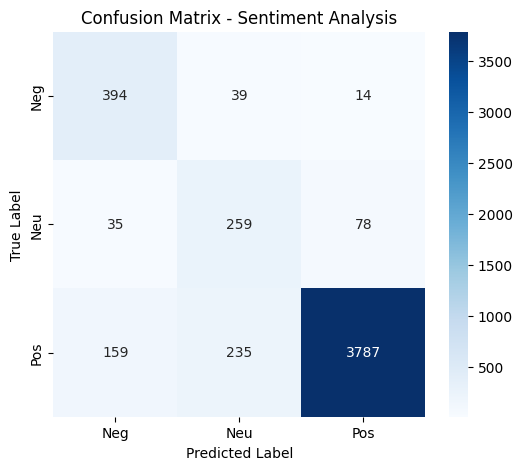

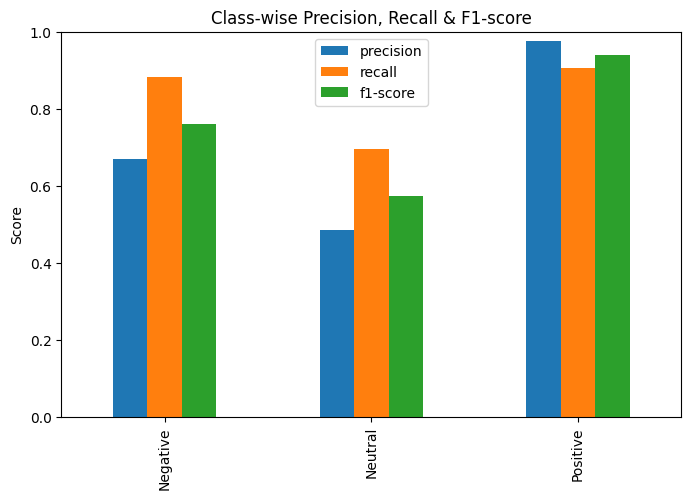

C:\Users\swastik dasgupta\AppData\Local\Temp\ipykernel_5252\3595667192.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=subset["label"].map(id2label), ax=ax[0], palette="cool")
C:\Users\swastik dasgupta\AppData\Local\Temp\ipykernel_5252\3595667192.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=subset["Predicted_Label_Text"], ax=ax[1], palette="cool")


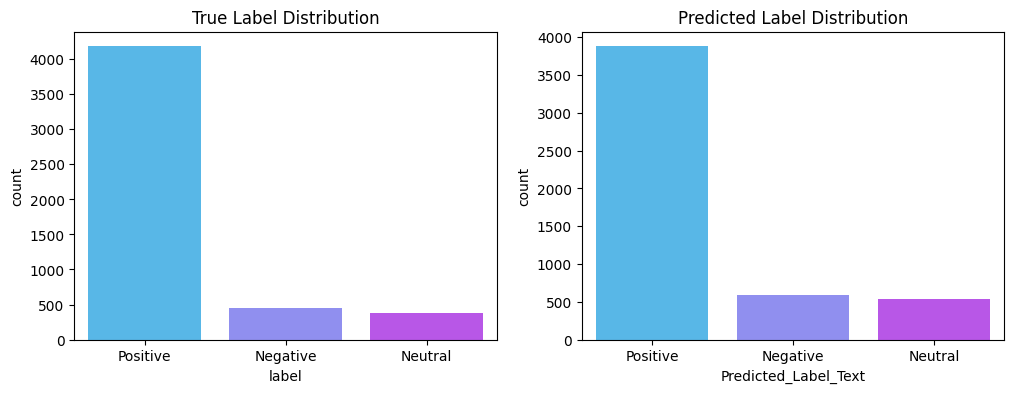

: 

In [ ]:
# ============================================================
# 1️⃣ Imports
# ============================================================
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from transformers import pipeline

# ============================================================
# 2️⃣ Load the last checkpoint
# ============================================================
checkpoint_path = "model/checkpoint_batch_10"  # change if needed

sentiment_analyzer = pipeline(
    "text-classification",
    model=checkpoint_path,
    tokenizer=checkpoint_path,
    device=0 if torch.cuda.is_available() else -1
)

print(f"✅ Loaded model from {checkpoint_path}")

# ============================================================
# 3️⃣ Evaluate on test subset (for speed)
# ============================================================
# You can change the sample size here if GPU memory allows
sample_size = 5000
subset = test_df.sample(sample_size, random_state=42).reset_index(drop=True)

predictions = []
scores = []

for review in subset["Cleaned_Review"]:
    result = sentiment_analyzer(review[:512])[0]
    predictions.append(result["label"])
    scores.append(result["score"])

subset["Predicted_Label_Text"] = predictions
subset["Confidence"] = scores

# ============================================================
# 4️⃣ Map text labels to numeric IDs
# ============================================================
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}

subset["Predicted_Label"] = subset["Predicted_Label_Text"].map(label2id)

# ============================================================
# 5️⃣ Compute Metrics
# ============================================================
acc = accuracy_score(subset["label"], subset["Predicted_Label"])
f1 = f1_score(subset["label"], subset["Predicted_Label"], average="weighted")
print(f"\n📊 Accuracy: {acc:.4f}")
print(f"📊 Weighted F1: {f1:.4f}\n")

print("📋 Classification Report:\n")
print(classification_report(subset["label"], subset["Predicted_Label"],
                            target_names=["Negative", "Neutral", "Positive"]))

# ============================================================
# 6️⃣ Confusion Matrix
# ============================================================
cm = confusion_matrix(subset["label"], subset["Predicted_Label"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Neg", "Neu", "Pos"],
            yticklabels=["Neg", "Neu", "Pos"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Sentiment Analysis")
plt.show()

# ============================================================
# 7️⃣ Class-wise Precision/Recall/F1 Bar Chart
# ============================================================
report = classification_report(subset["label"], subset["Predicted_Label"],
                               target_names=["Negative", "Neutral", "Positive"],
                               output_dict=True)
report_df = pd.DataFrame(report).transpose().iloc[:-3, :]  # exclude avg rows

report_df[["precision", "recall", "f1-score"]].plot(kind="bar", figsize=(8, 5))
plt.title("Class-wise Precision, Recall & F1-score")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()

# ============================================================
# 8️⃣ True vs Predicted Distribution
# ============================================================
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=subset["label"].map(id2label), ax=ax[0], palette="cool")
ax[0].set_title("True Label Distribution")
sns.countplot(x=subset["Predicted_Label_Text"], ax=ax[1], palette="cool")
ax[1].set_title("Predicted Label Distribution")
plt.show()
